#  Preferential attachment

In our endeavour to understand how the public transportation system expanded, we now turn to the concepts of preferential attachment and node fitness. Preferential attachment has for a long time been a central concept to explain network growth. The concept postulates that new nodes in a growing network are more likely to connect to existing nodes that already have many connections. This acts as a driving force behind so called scale-free networks where a small number of nodes have a very high number of connections, while most of nodes have only a few connections.[^61]

Network scientists find this notion intriguing since real-world networks frequently exhibit a scale-free distribution of edges. This pertains to public transport systems, where it has been widely hypothesised that a 20/80 rule applies, meaning that around 20% of the stops bear approximately 80% of the overall network burden.[^62]

To understand scale-free distribution, we need to introduce the concept of degree, which is simply refers to the number of connections or edges a node has. The degree distribution is then a summary that describes how many nodes have a certain number of connections. There are different types of degree distributions, one of which is the scale-free distribution introduced earlier, which would include the 20/80 rule. An alternative degree distribution is a random distribution, which might look like a bell curve in that most nodes have an average number of connections, with a smaller number having very high or very low connections. In an L-space graph, a scale-free degree distribution indicates that a newly added node is more likely to be added to an existing already well-connected node. This type of small-worldness, observed in public transport networks is seen as an effective method because it allows for connectivity and clustering around central nodes and for increased travel distance to more spare areas, which is measured in path length.[^63]

[^61]: Tom Snijders, Network Dynamics, in: Scott, John, Carrington, Peter (eds.), The SAGE Handbook of Social Network Analysis, London 2016, pg. 507.

[^62]: Tanuja Shanmukhappa, Ivan Wang-Hei Ho, K.Tse Chi, pg. 51.

[^63]: Ibid., pg 55.

In [2]:
# Loading necessary libraries, some must first be installed using pip

# Data Handling 
import pandas as pd
import numpy as np 

# Network Analysis
import networkx as nx

# Statistics
import scipy.stats as stats
from scipy.stats import linregress

# Data Visualization
import matplotlib.pyplot as plt
import matplotlib.cm as cm 
import matplotlib.patches as mpatches

# Data Loading and Connection
import json 

In [5]:
# Load
subgraphs_east = np.load('subgraphs_east.npy',allow_pickle='TRUE').item()

In [6]:
pa_snapshots = {}
for year, graph in subgraphs_east.items():
    if int(year[-4:]) > 1963 and int(year[-4:]) < 1988:
        pa_snapshots[year[-4:]] = graph

### Preferential attachment and scale-free distribution characteristics in our network

We can investigate preferential attachment in our network by analysing the degree distribution across multiple snapshots. If preferential attachment is a factor, we expect the degree distribution to display characteristics of a scale-free distribution, specifically, we expect to see an increase in hubs over time. We will test this in our network by looking at the degree distribution across snapshots. We begin with a visualisation of the trend of degree distribution in our network snapshots.

For this investigation, we will be constricting our analysis to just the period from 1964-1984 in East Berlin. We are doing this because we want to look at network expansion largely independent of significant external historical factors we observed in our first analysis section. The periods of reconstruction and the creation of the Berlin Wall do not allow for an observation of natural network evolution in terms of preferential attachment as we see excessive growth in the former and contraction in the latter. We also chose to focus on East Berlin because of the steady growth that was observed in the network nodes, which lends itself to this analysis. We thereby are avoiding the volatility of the source bias for West Berlin during this period.

C:\Users\noahb\AppData\Local\Temp\ipykernel_28020\36107111.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap('tab10')


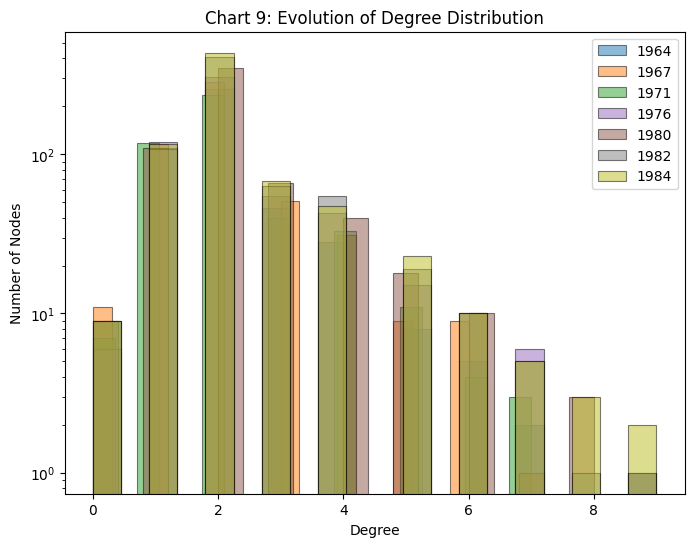

In [7]:
def plot_multiple_degree_distributions(graph_snapshots):
    plt.figure(figsize=(8, 6))  # Slightly larger figure
    cmap = plt.cm.get_cmap('tab10')

    for i, (year, graph) in enumerate(graph_snapshots.items()):
        degrees = np.array([d for n, d in graph.degree()])
        color = cmap(i / len(graph_snapshots))  # More direct normalization
        plt.hist(degrees, bins=20, color=color, alpha=0.5, edgecolor='black', linewidth=0.8, label=str(year))  

    plt.xlabel("Degree")
    plt.ylabel("Number of Nodes")
    plt.yscale('log')
    plt.title("Chart 9: Evolution of Degree Distribution")
    plt.legend()
    plt.show()

# Example Usage
plot_multiple_degree_distributions(pa_snapshots)

There is a clear increase in nodes with a higher degree. We see that the latter snapshots tend to have more higher degree nodes than earlier snapshots. We want to investigate this further by looking at 2 metrics. Firstly, we will calculate the total degree held by the top 5% of nodes in each of our network snapshots. Secondly, we will calculate the number of nodes that are hubs in our network; we can define hubs by the degree of the node being above a certain threshold, say 5.

In [8]:
def calculate_metrics(graph_snapshots, top_x_percent=5, hub_threshold=None):
    metrics = []
    for year, graph in graph_snapshots.items():
        degrees = np.array([d for n, d in graph.degree()])  # Get an array of node degrees
        total_degree = sum(degrees)  # Calculate the sum of all degrees
        top_x_degree = int(total_degree * top_x_percent / 100)  # Find the sum of degrees for the top x% nodes 

        # Calculate the number of hubs (if a threshold is provided)
        num_hubs = sum(d >= hub_threshold for d in degrees) if hub_threshold else 0

        metrics.append({
            'year': year,
            'top_x_degree': top_x_degree,
            'num_hubs': num_hubs
        })
    return metrics

metrics = calculate_metrics(pa_snapshots, top_x_percent=5, hub_threshold=5)

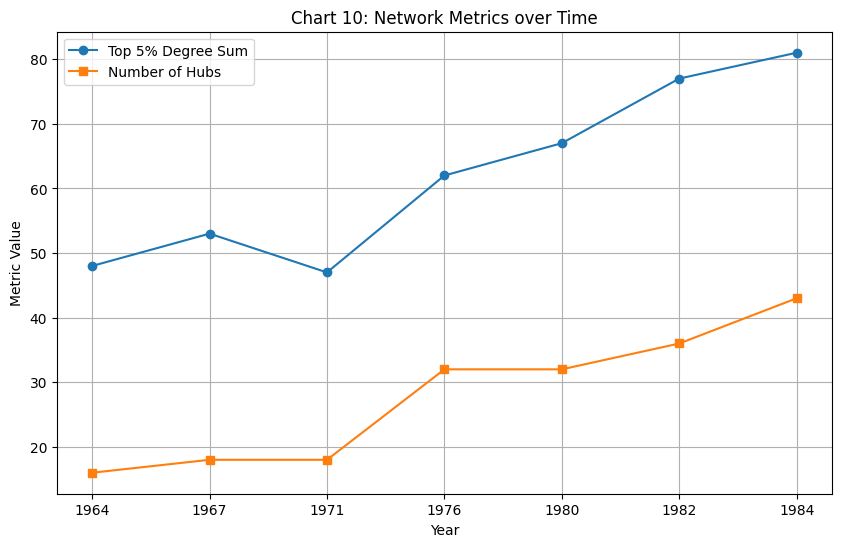

In [9]:
years = [metric['year'] for metric in metrics]
top_x_degrees = [metric['top_x_degree'] for metric in metrics]
num_hubs = [metric['num_hubs'] for metric in metrics]

plt.figure(figsize=(10, 6))  # Adjust figure size as needed

# Plot the top x% degree sum
plt.plot(years, top_x_degrees, marker='o', label='Top 5% Degree Sum')

# Plot the number of hubs
plt.plot(years, num_hubs, marker='s', label='Number of Hubs')

# Customize the plot
plt.xlabel('Year')
plt.ylabel('Metric Value')
plt.title('Chart 10: Network Metrics over Time')
plt.grid(True)
plt.legend()

plt.show()

In our results, we see a consistent increase in the total degree held by the top 5% of nodes. This signals a concentration of activity over time. Our second metric clearly shows a substantial increase in the number of nodes emerging as hubs over time, this value has more than doubled in the twenty years observed. Both of these metrics align with our expectations that the public transportation system exhibits preferential attachment dynamics. Both the concentration of connections and the increasing formation of hubs suggests that newly added nodes might be preferentially connected to nodes that already have many substantial connections. This indicates scale-free characteristics in our system, as a few hubs increasingly have a disproportionate number of connections.

While our observations are substantiated by the metrics, we have important considerations that must be addressed to contextualise these values. Firstly, the hub threshold of 5 was chosen because it means that at least three different lines must use a node to achieve a degree of 5. This is because a single line, will connect to a node with two edges, unless it is a terminal station. Thus, this node acts as a viable interchange station. We also know that other factors can play a significant role in explaining our evolving degree distribution. One of these factors could be the spatial layout of the transport system, specifically in regard to increasing population. This brings us to the next part of our analysis, in which we will use the idea of node fitness to test for alternative factors influencing hub creation.

### Proposing our hypothesis and introducing node fitness

The hypothesis that we will test is that "nodes in an area of lower population density are more likely to increase their connections". This suggests that the public transportation network aimed to expand into underserved areas before population increase in these areas happens. The second part of this hypothesis that will be tested is that "there is a strong correlation between network growth in an area and population increases".

The historical background to our hypothesis is the established historical argument that transportation is not the product of the metropole but its producer. This assumption has existed since the early 1900s when national economist Carl Ballod argued that "It was not the urban expansion plan that primarily determined the structural expansion of the metropolis, but the route and speed of mass transportation".[^64] More recently, Arvid Krüger has also argued that long-term spatial developments including population increase follow the development of traffic, not precede it. His work specifically looks at post-1990 Berlin and the increases in population in areas outside of the city. Arvid argued specifically that an area like Falkensee would not have had the population increase it did if there had not already been a S-Bahn connection servicing the area. [^65]

To truly explore this issue, we have to move beyond the concept of preferential attachment and include another theory that was developed in the late 1990s and early 2000s in network science, known as the fitness hypothesis.

The fitness hypothesis adds another layer to preferential attachment. Here, nodes have intrinsic qualities or fitness which determines their connection probability.[^66] This is contrary to a basic understanding of preferential attachment in which all nodes are equally likely to attract new nodes, when excluding their existing degree.

To test the applicability of the fitness model of network growth, we will be using the work of Garlaschelli and Loffredo as an example. This work investigated the World Trade Web and hypothesised that trade between countries could be better explained using GDP as the fitness of the node (country) than preferential attachment alone. To do this, they compared the predicted behaviour with the empirical one and found close agreement between them.[^67]

[^64]: Carl Ballod, Schnellverkehr und Tarifreform, in: Jahrbuch für Gesetzgebung, Verwaltung und Volkswirtschaft im Deutschen Reiche, 28.

[^65]: Arvid Krüger, Die Bahn als Treiber der Siedlungsentwicklung?, Kassel 2021, pg. 25.

[^66]: Diego Garlaschelli, Maria I. Loffredo, Fitness-dependent topological properties of the world trade web, in: Physical review letters 93(18), 2004, pg. 1.

[^67]: Ibid., pg. 3.

### Analysing Network Growth Over Time

To begin with, we will introduce the external data we are using for this section. We have gathered administrative and population data for East Berlin for the time period of 1964 -- 1984. This data includes the administrative districts in East Berlin at the end of each snapshot year, its area in square kilometres, its population and its population density.

The sources for this information are yearly statistics (Statistische Jahrbücher), published by the Statistisches Landesamt Berlin from 1952 -- 1990.[^68] These are West Berlin publications, which also published information for East Berlin, taken from the Statistische Jahrbücher of the DDR. As official state statistical information, the validity of the figures should be high, however, particularly for the population statistics, there may have been pressure to downplay any emigration in the context of the Cold War.[^69] This is another reason we have decided to focus on the period after the construction of the Berlin Wall, because we can be relatively certain that there were no major population losses at the time that were covered up in the available data.

[^68]: You can find all Statische Jahrbücher scanned and published by the Zentral- und Landesbibliothek Berlin https://digital.zlb.de/viewer/metadata/16308449/2/.

[^69]: M. Fenemore, Fighting the Cold War in Post-Blockade, Pre-Wall Berlin, Berlin 2019, pg. 221.

In [10]:
# Load from the JSON file
with open("data-external/district-data.json", "r") as infile:
    district_data = json.load(infile)

In [11]:
def assign_bezirk_attributes(G, dictionary):
    """
    Assigns 'bezirk', 'area', 'population' attributes to nodes in the graph for specific year.

    """
    updated_graph = G.copy() 

    for node in updated_graph.nodes:
        neighbourhood = updated_graph.nodes[node].get('neighbourhood')  # Get neighborhood, handle missing attribute gracefully

        for district, data in dictionary.items():
            if neighbourhood in data[0]:  # Check if neighborhood is within the district
                updated_graph.nodes[node]['bezirk'] = district
                updated_graph.nodes[node]['area'] = data[1]
                updated_graph.nodes[node]['population'] = data[2]
                try:
                    updated_graph.nodes[node]['population_density'] = data[3]
                except:
                    updated_graph.nodes[node]['population_density'] = data[2] / data[1]
                break  # Stop searching once a match is found
        
    nodes_to_remove = []
    for node, data in updated_graph.nodes(data=True): 
        if data['neighbourhood'] == "nan":
            nodes_to_remove.append(node)

    for node in nodes_to_remove:
        updated_graph.remove_node(node)

    return updated_graph

In [12]:
def update_graph_for_year(graph, year, district_data):
    for n, data in graph.nodes(data=True):
        updated_graph = assign_bezirk_attributes(graph, district_data[year])
    return updated_graph

pa_subgraphs_with_data = {}

for year, graph in subgraphs_east.items():
    if int(year[-4:]) in [1964, 1967, 1971, 1976, 1980, 1982, 1984]:
        updated_graph = update_graph_for_year(graph, year[-4:], district_data)
        pa_subgraphs_with_data[year[-4:]] = updated_graph 

To assess the relationship between network development and existing infrastructure, we define a network utilisation score, which will be the fitness of the node. This score considers a node\'s population density and the total number of nodes within its district (district node count). These factors represent the potential demand for network services within a particular area. We then divide this combined value by the node\'s degree (number of connections). A higher degree, with population density and node count held constant, suggests a more extensive network already exists in that location, potentially indicating lower per-connection utilisation. Therefore, this revised utilisation score reflects the relative intensity of network usage within a node\'s district. Our hypothesis proposes that nodes with a lower utilisation score (areas with higher potential demand and potentially less existing infrastructure) are more likely to experience an increase in degree (gain new connections) in subsequent network snapshots. This analysis aims to explore if areas with higher network utilisation are already well-served and less likely to see further expansion.

In [13]:
def calculate_utilisation(G):
    utilisation = {}
    bezirk_counts = {}  

    for node, data in G.nodes(data=True):
        if 'bezirk' in data and not pd.isna(data['bezirk']):
            bezirk = data['bezirk'] 
            bezirk_counts[bezirk] = bezirk_counts.get(bezirk, 0) + 1

    for node, data in G.nodes(data=True):
        if 'bezirk' in data and not pd.isna(data['bezirk']):  # Check for 'bezirk' again
            bezirk_node_count = bezirk_counts.get(data['bezirk'], 0)
            if nx.degree(G, node) != 0:
                utilisation[node] = ((1 /data['population_density']) * (1 / bezirk_node_count)) / nx.degree(G, node)
            else: 
                utilisation[node] = 0
        else: 
            utilisation[node] = 0
    return utilisation

In [14]:
# Analysis
for i in range(len(pa_subgraphs_with_data) - 1):
    year1 = list(pa_subgraphs_with_data.keys())[i]
    year2 = list(pa_subgraphs_with_data.keys())[i+1]

    G1 = pa_subgraphs_with_data[year1]
    G2 = pa_subgraphs_with_data[year2]

    utilisation = calculate_utilisation(G1)  # Calculate utilisation

    matching_underutilisation = []  # Store utilisation for matching nodes 

    degree_changes = []
    for n in G1.nodes():
        if n in G2.nodes():  # Check if the node exists in the next snapshot
            degree_1 = G1.degree(n)
            degree_2 = G2.degree(n)
            degree_change = degree_2 - degree_1
            matching_underutilisation.append(utilisation[n])  # Add underutilisation
            degree_changes.append(degree_change)

    # Analysis of correlation 
    df = pd.DataFrame({'utilisation': matching_underutilisation, 'degree_change': degree_changes})  # Updated list
    correlation = df['utilisation'].corr(df['degree_change'])
    print(f"Correlation for years {year1}-{year2}:", correlation)

Correlation for years 1964-1967: 0.043657186656731024
Correlation for years 1967-1971: -0.019640912686584033
Correlation for years 1971-1976: -0.003523133443241033
Correlation for years 1976-1980: 0.016563623841320662
Correlation for years 1980-1982: 0.017135444418461356
Correlation for years 1982-1984: 0.0035103239880702056


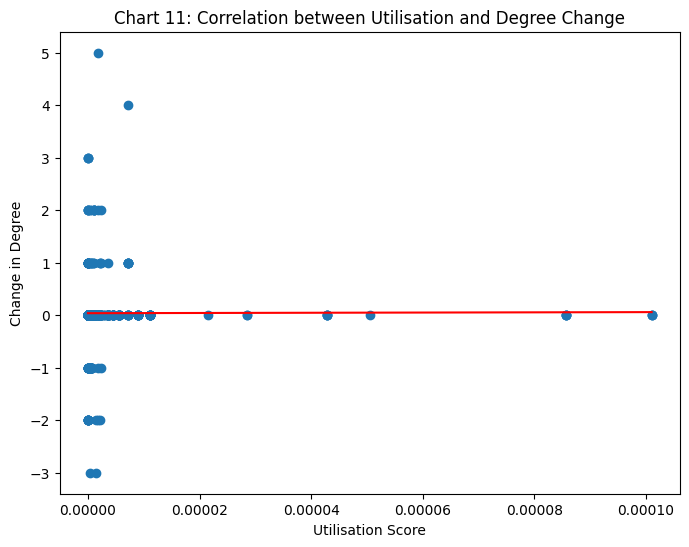

In [15]:
# Create the scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(df['utilisation'], df['degree_change'])
plt.xlabel("Utilisation Score")  # Correct label
plt.ylabel("Change in Degree")
plt.title("Chart 11: Correlation between Utilisation and Degree Change")

# Adding a regression line
slope, intercept = np.polyfit(df['utilisation'], df['degree_change'], 1)
best_fit_x = [df['utilisation'].min(), df['utilisation'].max()]
best_fit_y = [slope * x + intercept for x in best_fit_x]
plt.plot(best_fit_x, best_fit_y, color='red')  # Plot regression line in red

plt.show()

Our results show no real correlation between our utilisation score and degree change as the network evolves. We actually see a slight but not significant positive correlation that would point to a general trend that higher utilisation scores tend to experience greater increases in degree. This goes against our expectations that areas with less network usage might see more further development. However, the correlations for all periods teeter around 0 (between 0.04 and -0.02). This indicates that there is no relationship between our utilisation score and degree change. The results indicate that other factors are stronger determinants of network growth.

A weakness of the approach may have been that the number of nodes that appeared from one snapshot to the next was simply not significant enough, especially since the amount of degree changes would have been even less. This leads to more random results. We have calculated that around 22% of nodes exist only in 1 snapshot, this figure is high, but it is not high enough for this to be the main cause of error in our utilisation score.

In [16]:
def analyze_node_persistence(pa_subgraphs_with_data):
    node_counts = {}
    total_nodes = set()  # To keep track of unique nodes

    for year, graph in pa_subgraphs_with_data.items():
        nodes_in_year = set(graph.nodes())
        total_nodes.update(nodes_in_year)

        for node in nodes_in_year:
            node_counts[node] = node_counts.get(node, 0) + 1

    snapshot_appearance_counts = {}
    for persistence in node_counts.values():
        snapshot_appearance_counts[persistence] = snapshot_appearance_counts.get(persistence, 0) + 1

    total_snapshots = len(pa_subgraphs_with_data)
    for snapshots_present, count in snapshot_appearance_counts.items():
        percentage = (count / len(total_nodes)) * 100
        print(f"{percentage:.1f}% of nodes appear in {snapshots_present} snapshots")

In [17]:
analyze_node_persistence(pa_subgraphs_with_data) 

12.2% of nodes appear in 4 snapshots
18.3% of nodes appear in 7 snapshots
7.5% of nodes appear in 5 snapshots
17.3% of nodes appear in 2 snapshots
15.7% of nodes appear in 3 snapshots
21.9% of nodes appear in 1 snapshots
7.2% of nodes appear in 6 snapshots


### Revising our hypothesis

The previous analysis, focusing on a complex utilisation metric, revealed weak correlations between network underutilisation and subsequent degree changes. This finding, while suggestive, highlights the complex interplay of factors influencing network development. To gain greater clarity, we now shift our attention to a potentially more direct question: Is the increase in a district\'s network strength (measured by total degree) correlated with population growth over the same period?

We want to see if there is a strong correlation between network degree change and population increase in the districts of East Berlin during the period under observation. We want to explore if network growth in a district is correlated to the increase of network strength (measured by total degree) in a network.

If we discover a strong positive correlation, it strengthens the hypothesis that network expansion precedes and potentially facilitates population increases. This contrast with the earlier analysis underscores both the multifaceted nature of network development and the potential value of simpler models when exploring specific relationships within complex systems.

In order to gain a degree of insight into causation, we are taking the population data of the district at the end of the year while the network data is from snapshots earlier in the year, often around April or May. This temporal lag leaves the possibility that if the correlation is strong, it may be that there was a causation effect on population increase, in line with our hypothesis. This though would be no implication of causation but would rather leave the possibility open for causation to be further investigated. Other influences on population growth such as housing policies and economic development are all tied together, and ascertaining any directionality of causation is impossible without further investigation of a wide range of sources in close reading as well.

In [18]:
def get_unique_bezirke(graph):
    bezirke = set(data['bezirk'] for node, data in graph.nodes(data=True) if 'bezirk' in data)
    return list(bezirke)  # Convert to list for easier iteration

def calculate_bezirk_degree_strength(graph):
    bezirk_degrees = {}
    for node, data in graph.nodes(data=True):
        if 'bezirk' in data:
            bezirk = data['bezirk']
            bezirk_degrees[bezirk] = bezirk_degrees.get(bezirk, 0) + graph.degree(node)
    return bezirk_degrees

def calculate_bezirk_weighted_degree_strength(graph):
    bezirk_weighted_degrees = {}
    for node, data in graph.nodes(data=True):
        if 'bezirk' in data:
            bezirk = data['bezirk']
            total_weight = 0
            for neighbor in graph.neighbors(node):  # Iterate over neighbors of the node
                total_weight += graph.edges[node, neighbor].get('weight', 1)  # Fetch weight or default to 1

            bezirk_weighted_degrees[bezirk] = bezirk_weighted_degrees.get(bezirk, 0) + total_weight
    return bezirk_weighted_degrees

In [19]:
def get_population_changes_for_year(population_data, year):
    population_changes = {}
    changes = {}
    available_years = sorted(population_data.keys())  # Sort to ensure predictable order

    # Find the correct previous year 
    for i in range(len(available_years)):
        if available_years[i] == year:
            if i > 0: 
                previous_year = available_years[i - 1]  # Get the previous year from the list
                break  # Exit the loop once we find the previous year
            else:
                # If it's the first year, there's no previous data
                return population_changes  

    current_year_data = population_data[year]
    previous_year_data = population_data[previous_year]

    for bezirk in current_year_data:  
        previous_population = previous_year_data.get(bezirk, [None, None, 0, None])[2] 
        current_population = current_year_data[bezirk][2]
        changes[bezirk] = current_population - previous_population  # Store population change

        previous_area = previous_year_data.get(bezirk, [None, 0, None, None])[1] # Get area
        current_area = current_year_data[bezirk][1]

        # Ensure area was present in both years and is non-zero
        if previous_area and current_area and previous_area != 0 and current_area != 0:
            previous_density = previous_population / previous_area
            current_density = current_population / current_area
            changes[bezirk + '_density'] = current_density - previous_density

        # Absolute values
        changes[bezirk + '_population_abs'] =  current_population 
        changes[bezirk + '_density_abs'] =  current_population / current_area  # Update with absolute density 
        
    return changes

In [20]:
def analyze_correlation(snapshots, population_data): 
    all_data = []
    previous_bezirk_degrees = {}  # Store degrees from the previous year

    for year, graph in snapshots.items():
        bezirke = get_unique_bezirke(graph)
        bezirk_degrees = calculate_bezirk_degree_strength(graph)
        bezirk_degrees_weighted = calculate_bezirk_weighted_degree_strength(graph)
        population_changes = get_population_changes_for_year(population_data, year) 


        for bezirk in bezirke:

            absolute_population = population_changes.get(bezirk + '_population_abs', 0) 
            absolute_density = population_changes.get(bezirk + '_density_abs', 0)  # Fetch absolute density
            
            data = {
                'year': year,
                'bezirk': bezirk,
                'degree_strength': bezirk_degrees[bezirk], 
                'degree_strength_weighted': bezirk_degrees_weighted[bezirk],
                'population_change': population_changes.get(bezirk, 0), 
                'density_change': population_changes.get(bezirk + '_density', 0),
                'population': absolute_population,
                'density': absolute_density
            }

            # Degree Change 
            previous_degree = previous_bezirk_degrees.get(bezirk, 0)  
            data['degree_change'] = bezirk_degrees[bezirk] - previous_degree

            # Weighted Degree Change
            previous_degree_weighted = previous_bezirk_degrees.get(bezirk + "_weighted", 0)
            data['degree_change_weighted'] = bezirk_degrees_weighted[bezirk] - previous_degree_weighted

            all_data.append(data)

        previous_bezirk_degrees = bezirk_degrees.copy()  # Update for the next iteration
        previous_bezirk_degrees = {bezirk + "_weighted" : degree for bezirk, degree in bezirk_degrees_weighted.items()} # Store weighted degrees

    df = pd.DataFrame(all_data) 

    # removing rows where districts are created for first time
    df = df[df['density_change'] != 0]  

    
    # Calculate correlations and p-values
    correlations = {}
    for feature1 in ['degree_change', 'degree_change_weighted']:
        for feature2 in ['population_change', 'density_change']:
            corr, p_value = stats.pearsonr(df[feature1], df[feature2])
            correlations[f"{feature1} - {feature2}"] = (corr, p_value)

    return df, correlations

In [21]:
df, correlations = analyze_correlation(pa_subgraphs_with_data, district_data)

C:\Users\noahb\AppData\Local\Temp\ipykernel_28020\1980311921.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('tab10', len(unique_years))  # 'tab10' is a good discrete colormap


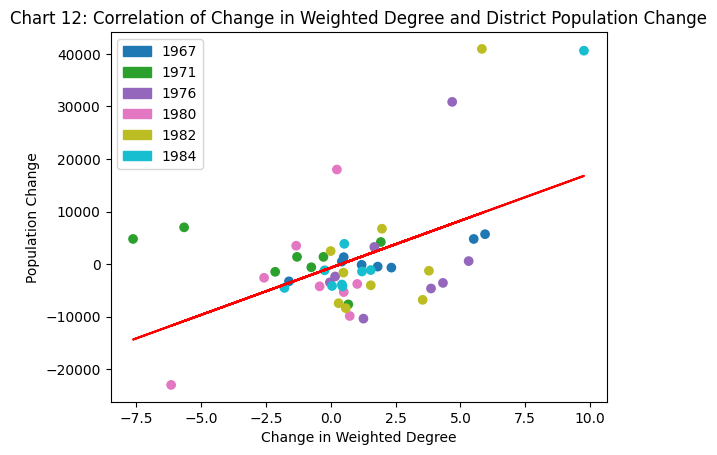

In [22]:
# Assign a color to each unique year 
unique_years = df['year'].unique()
cmap = cm.get_cmap('tab10', len(unique_years))  # 'tab10' is a good discrete colormap
colors = cmap(range(len(unique_years)))

color_dict = dict(zip(unique_years, colors))

# Map the year column to colors
df['color'] = df['year'].map(color_dict)

# Plot using the 'color' column
plt.scatter(df['degree_change_weighted'], df['population_change'], c=df['color'])

plt.xlabel('Change in Weighted Degree')
plt.ylabel('Population Change')
plt.title('Chart 12: Correlation of Change in Weighted Degree and District Population Change')
# Legend handles
handles = [mpatches.Patch(color=color, label=year) for year, color in color_dict.items()]
plt.legend(handles=handles) 

# Calculate regression line
slope, intercept, r_value, p_value, std_err = linregress(df['degree_change_weighted'], df['population_change'])

# Best-fit line coordinates
x_vals = df['degree_change_weighted']
best_fit_y = slope * x_vals + intercept

# Plot the regression line
plt.plot(x_vals, best_fit_y, color = 'red', label='Regression Line')

plt.show()

Our results show a moderately strong correlation (0.49) between change in weighted degree change and population change. This suggests a dynamic relationship where network expansion is linked to population increases in a district. The comparison to the weaker correlation of degree change and population change (0.22) indicates that there is a particular type of network expansion (one with higher weighted edges) that is highly correlated to population increase. This would point to the expansion of the S-Bahn holding particular importance, as these are the edges with the highest weights, along with the U-Bahn (of which East Berlin however, only had two lines at the time).

### Conclusion on PA

Our analysis of the East Berlin public transportation network\'s historical expansion has explored a multifaceted process of understanding change based on preferential attachment and node fitness. We confirmed the presence of preferential attachment dynamics within the network. The degree distribution showed a pattern consistent with a scale-free structure, where hubs emerged and increasingly gained connections over time. This supports the understanding that newly added nodes tend to preferentially attach to well-established nodes, mirroring observations in other real-world transport networks.

Moving beyond preferential attachment, we investigated the fitness hypothesis using a defined utilisation score. Contrary to our initial hypothesis, nodes with lower initial utilisation were not more likely to gain new connections. This highlights the intricate factors shaping network growth, where population density and existing infrastructure might not be the sole determinants.

We then attempted to circumvent the limitations and faults in the current network model by investigating change not on the node level but on the geographic district level. We explored the relationship between network expansion and population growth, which revealed a moderately strong correlation. Districts experiencing an increase in network strength, potentially due the expansion of higher-weighted S-Bahn and U-Bahn lines, often saw corresponding population increases. This correlation, coupled with the temporal lag between network data and population data, raises the possibility that network expansion played a role in facilitating population growth, supporting a central argument of urban historians. However, we must emphasise that correlation does not imply causation. Further historical research is needed to fully untangle the complex relationship between network expansion, population growth, and other factors like housing policies and economic development.

Overall, our findings demonstrate the value of applying network science concepts to historical data. Concepts like preferential attachment and node fitness provide a quantitative framework to investigate processes of urban and infrastructural evolution. By blending these frameworks with nuanced historical analysis, we can move towards a more comprehensive understanding of how our transportation system and urban development intertwine over time. We are however constrained by our data collection and modelling process and have to be able to reflect on the strengths and weaknesses involved when analysing based on these.

In the future, we will explore additional relating fitness indices that have the potential to act as influencing factors in network growth. We could plug in further geographically based socioeconomic data or even historical land-use data. We also encourage the blending of a qualitative approach to the research. It would have been beneficial to integrate qualitative historical evidence, such as urban planning policies, and personal accounts, to enrich our understanding of factors driving network development decisions.